In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
%matplotlib inline

/Users/perdue/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
f = h5py.File('minosmatch_nukecczdefs_genallz_pcodecap66_127x50x25_xuv_me1Bmc_0000.hdf5', 'r')

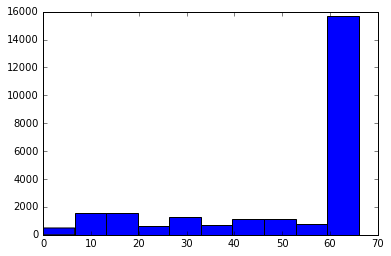

In [3]:
n, bins, patches = plt.hist(f['planecodes'])

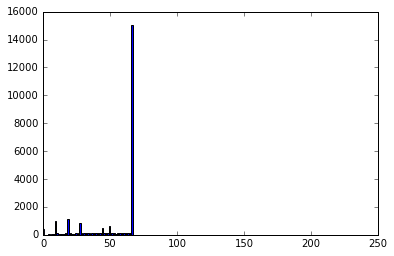

In [4]:
_, _, _ = plt.hist(f['planecodes'], bins=214, range=(0, 214))

In [5]:
import plane_codes

In [6]:
plane_codes.build_reversed_indexed_codes()

{0: (-999, -999, -999),
 1: (-5, 1, 0),
 2: (-5, 2, 0),
 3: (-4, 1, 0),
 4: (-4, 2, 0),
 5: (-3, 1, 0),
 6: (-3, 2, 0),
 7: (-2, 1, 0),
 8: (-2, 2, 0),
 9: (-1, 0, 1),
 10: (0, 1, 0),
 11: (0, 2, 0),
 12: (1, 1, 0),
 13: (1, 2, 0),
 14: (2, 1, 0),
 15: (2, 2, 0),
 16: (3, 1, 0),
 17: (3, 2, 0),
 18: (4, 0, 2),
 19: (5, 1, 0),
 20: (5, 2, 0),
 21: (6, 1, 0),
 22: (6, 2, 0),
 23: (7, 1, 0),
 24: (7, 2, 0),
 25: (8, 1, 0),
 26: (8, 2, 0),
 27: (9, 0, 3),
 28: (11, 1, 0),
 29: (11, 2, 0),
 30: (12, 1, 0),
 31: (12, 2, 0),
 32: (13, 1, 0),
 33: (13, 2, 0),
 34: (14, 1, 0),
 35: (14, 2, 0),
 36: (15, 1, 0),
 37: (15, 2, 0),
 38: (16, 1, 0),
 39: (16, 2, 0),
 40: (17, 1, 0),
 41: (17, 2, 0),
 42: (18, 1, 0),
 43: (18, 2, 0),
 44: (19, 0, 4),
 45: (20, 1, 0),
 46: (20, 2, 0),
 47: (21, 1, 0),
 48: (21, 2, 0),
 49: (22, 0, 5),
 50: (23, 1, 0),
 51: (23, 2, 0),
 52: (24, 1, 0),
 53: (24, 2, 0),
 54: (25, 1, 0),
 55: (25, 2, 0),
 56: (26, 1, 0),
 57: (26, 2, 0),
 58: (27, 1, 0),
 59: (27, 2, 0),


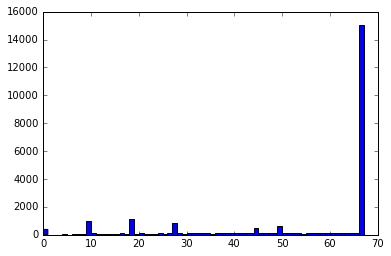

In [7]:
n, bins, patches = plt.hist(f['planecodes'], bins=np.arange(71))

In [8]:
planes = np.zeros(np.shape(f['planecodes']))
f['planecodes'].read_direct(planes)

(array([  3.85000000e+02,   9.00000000e+00,   9.00000000e+00,
          1.00000000e+01,   2.30000000e+01,   2.00000000e+01,
          3.30000000e+01,   7.80000000e+01,   7.40000000e+01,
          1.01500000e+03,   9.60000000e+01,   8.70000000e+01,
          9.30000000e+01,   9.20000000e+01,   9.30000000e+01,
          8.30000000e+01,   1.06000000e+02,   8.70000000e+01,
          1.10300000e+03,   8.80000000e+01,   9.50000000e+01,
          8.20000000e+01,   8.60000000e+01,   8.30000000e+01,
          9.90000000e+01,   9.20000000e+01,   9.40000000e+01,
          8.27000000e+02,   9.40000000e+01,   8.80000000e+01,
          9.50000000e+01,   9.50000000e+01,   9.70000000e+01,
          1.10000000e+02,   1.02000000e+02,   8.90000000e+01,
          9.70000000e+01,   9.50000000e+01,   9.70000000e+01,
          1.13000000e+02,   9.40000000e+01,   1.31000000e+02,
          1.16000000e+02,   9.50000000e+01,   4.73000000e+02,
          1.22000000e+02,   1.11000000e+02,   1.04000000e+02,
        

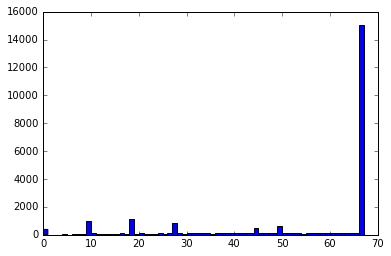

In [9]:
plt.hist(planes[planes < 70], bins=np.arange(71))  # last bins are `[67, 68), [68, 69), [69, 70)`

70
71


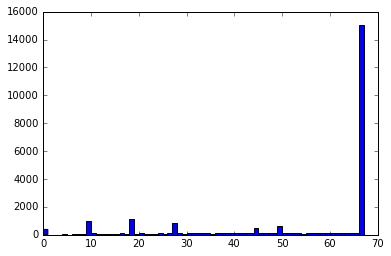

In [10]:
n, bins, _ = plt.hist(planes[planes < 70], bins=np.arange(71))
print len(n)
print len(bins)

In [11]:
print any(planes == 67)

False


In [12]:
print any(planes > 66)

False


In [13]:
print any(planes < 0)

False


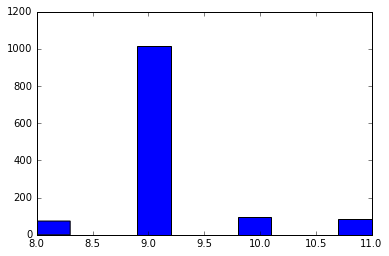

In [14]:
a = np.where(planes >= 8)
b = np.where(planes <= 11)
c = list(set(a[0]) & set(b[0]))
n, bins, patches = plt.hist(planes[c])    # tgt1 == 9

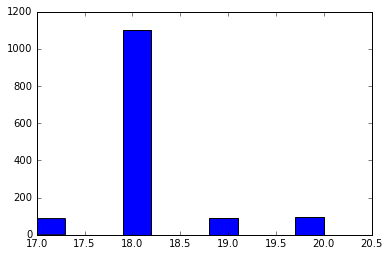

In [15]:
a = np.where(planes >= 17)
b = np.where(planes <= 20)
c = list(set(a[0]) & set(b[0]))
n, bins, patches = plt.hist(planes[c])    # tgt2 == 18

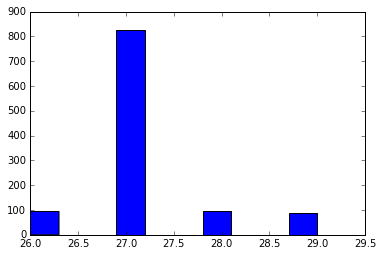

In [16]:
a = np.where(planes >= 26)
b = np.where(planes <= 29)
c = list(set(a[0]) & set(b[0]))
n, bins, patches = plt.hist(planes[c])    # tgt3 == 27

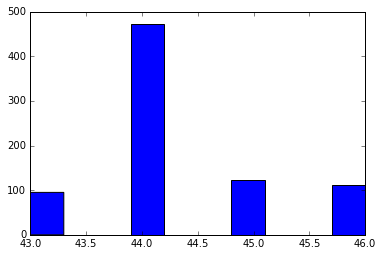

In [17]:
a = np.where(planes >= 43)
b = np.where(planes <= 46)
c = list(set(a[0]) & set(b[0]))
n, bins, patches = plt.hist(planes[c])    # tgt4 == 44

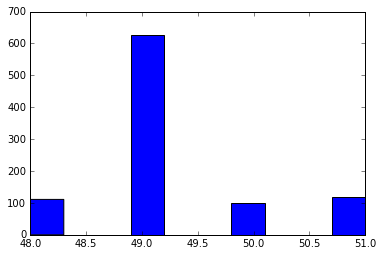

In [18]:
a = np.where(planes >= 48)
b = np.where(planes <= 51)
c = list(set(a[0]) & set(b[0]))
n, bins, patches = plt.hist(planes[c])    # tgt5 == 49

In [19]:
segments = np.zeros(np.shape(f['segments']))
f['segments'].read_direct(segments)

(array([   232.,   1265.,   1364.,   1096.,    794.,   1010.,    478.,
           447.,   1338.,    112.,  16863.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 11 Patch objects>)

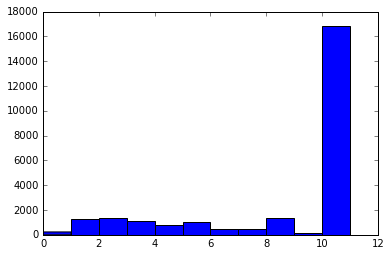

In [20]:
plt.hist(segments, bins=np.arange(12))

In [21]:
print np.min(planes)
print np.max(planes)

0.0
66.0
